In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=7a7296aefbf8ba64f93a7ef71401b82d327108b085733e46204e5f2bd7add8fc
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import numpy as np
import pandas as pd
import ta
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
def download_data(stock_name,start,end):
  stock=yf.Ticker(stock_name)
  data=stock.history(interval='1d',start=start,end=end)
  return data

result=download_data("DHR",'2022-01-01','2023-06-30')
print(result.head())

                                 Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  287.601775  288.876606  274.642456  277.614136   
2022-01-04 00:00:00-05:00  275.187532  277.860282  268.479280  270.140961   
2022-01-05 00:00:00-05:00  272.110321  273.393959  268.364972  268.417725   
2022-01-06 00:00:00-05:00  267.758382  269.296943  263.019516  267.204468   
2022-01-07 00:00:00-05:00  266.228537  266.817589  258.307014  259.951111   

                            Volume  Dividends  Stock Splits  
Date                                                         
2022-01-03 00:00:00-05:00  4132992        0.0           0.0  
2022-01-04 00:00:00-05:00  5044754        0.0           0.0  
2022-01-05 00:00:00-05:00  4199431        0.0           0.0  
2022-01-06 00:00:00-05:00  2247089        0.0           0.0  
2022-01-07 00:00:00-05:00  3645245        0.0           0.0  


In [ ]:
def vwap_indicator(data,window):
  vwap=ta.volume.VolumeWeightedAveragePrice(high=data['High'],low=data['Low'],close=data['Close'],volume=data['Volume'],window=window)
  vwap_values=vwap.volume_weighted_average_price()
  return vwap_values

vwap=vwap_indicator(result,30)
result['VWAP']=vwap
print(result)

                                 Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  287.601775  288.876606  274.642456  277.614136   
2022-01-04 00:00:00-05:00  275.187532  277.860282  268.479280  270.140961   
2022-01-05 00:00:00-05:00  272.110321  273.393959  268.364972  268.417725   
2022-01-06 00:00:00-05:00  267.758382  269.296943  263.019516  267.204468   
2022-01-07 00:00:00-05:00  266.228537  266.817589  258.307014  259.951111   
...                               ...         ...         ...         ...   
2023-06-23 00:00:00-04:00  207.454742  211.156623  207.021836  210.432144   
2023-06-26 00:00:00-04:00  210.511668  211.642548  207.278063  210.167099   
2023-06-27 00:00:00-04:00  210.962264  210.962264  203.982601  206.562424   
2023-06-28 00:00:00-04:00  206.288539  207.923020  204.371350  207.419434   
2023-06-29 00:00:00-04:00  206.623344  210.329473  204.898544  210.311783   

In [ ]:
def sma_indicator(data,window):
  sma=ta.trend.SMAIndicator(data['Close'],window=window)
  sma_values=sma.sma_indicator()
  return sma_values

sma=sma_indicator(result,5)
result['SMA']=sma
result=result.dropna()
print(result.head())

                                 Open        High         Low       Close  \
Date                                                                        
2022-02-14 00:00:00-05:00  238.788909  240.705559  236.353544  238.700989   
2022-02-15 00:00:00-05:00  241.813364  243.853087  235.544713  236.564575   
2022-02-16 00:00:00-05:00  235.729346  237.153641  230.788279  235.351288   
2022-02-17 00:00:00-05:00  235.351290  238.780141  233.241230  236.740417   
2022-02-18 00:00:00-05:00  237.892124  237.988837  233.082939  234.683075   

                            Volume  Dividends  Stock Splits        VWAP  \
Date                                                                      
2022-02-14 00:00:00-05:00  3399905        0.0           0.0  253.317908   
2022-02-15 00:00:00-05:00  3704239        0.0           0.0  251.850572   
2022-02-16 00:00:00-05:00  4108627        0.0           0.0  250.300916   
2022-02-17 00:00:00-05:00  3638815        0.0           0.0  249.100927   
2022-02-18

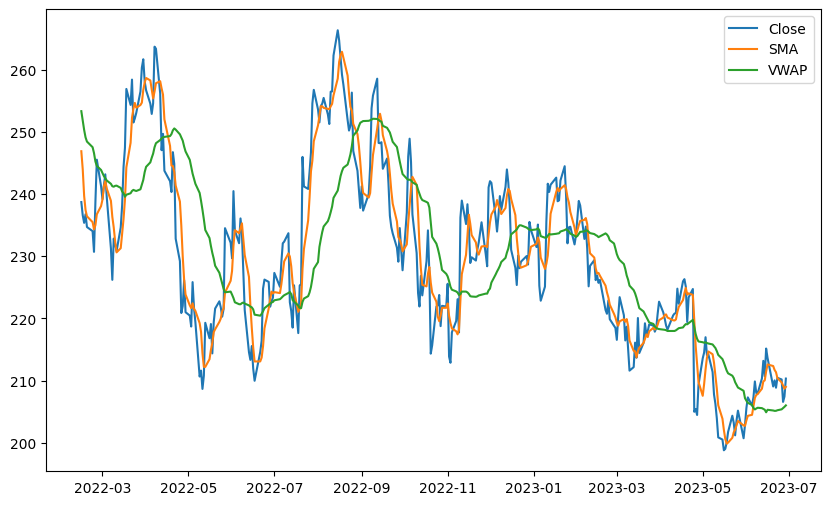

In [14]:
plt.figure(figsize=(10,6))
plt.plot(result['Close'])
plt.plot(result['SMA'])
plt.plot(result['VWAP'])
plt.legend(['Close','SMA','VWAP'])
plt.show()

In [15]:
def calculate_signals(data):
  close_sma=data['Close']-data['VWAP']
  close_vwap=data['SMA']-data['VWAP']
  long_condition=(close_sma<0)&(close_vwap<0)&(data['Close'].shift(2)>data['Close'])
  short_condition=(close_sma>0)&(close_vwap>0)&(data['Close'].shift(2)<data['Close'])
  new_series=np.where(long_condition,1,np.where(short_condition,-1,0))
  return new_series

thesignals=calculate_signals(result)
result['Signal']=thesignals
print(result['Signal'])

Date
2022-02-14 00:00:00-05:00    0
2022-02-15 00:00:00-05:00    0
2022-02-16 00:00:00-05:00    1
2022-02-17 00:00:00-05:00    0
2022-02-18 00:00:00-05:00    1
                            ..
2023-06-23 00:00:00-04:00   -1
2023-06-26 00:00:00-04:00   -1
2023-06-27 00:00:00-04:00    0
2023-06-28 00:00:00-04:00    0
2023-06-29 00:00:00-04:00   -1
Name: Signal, Length: 345, dtype: int64


<ipython-input-15-7f2f9fb46703>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal']=thesignals


<ipython-input-17-5631e4e25328>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Daily Returns']=result['Close'].pct_change()*result['Signal'].shift(1)
<ipython-input-17-5631e4e25328>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Cummulative Returns']=(1+result['Daily Returns']).cumprod()*100
<ipython-input-17-5631e4e25328>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

                           Daily Returns  Cummulative Returns
Date                                                         
2022-02-14 00:00:00-05:00            NaN                  NaN
2022-02-15 00:00:00-05:00      -0.000000           100.000000
2022-02-16 00:00:00-05:00      -0.000000           100.000000
2022-02-17 00:00:00-05:00       0.005902           100.590237
2022-02-18 00:00:00-05:00      -0.000000           100.590237
...                                  ...                  ...
2022-11-22 00:00:00-05:00      -0.007614           128.623360
2022-11-23 00:00:00-05:00      -0.004999           127.980338
2022-11-25 00:00:00-05:00      -0.014012           126.187108
2022-11-28 00:00:00-05:00       0.022019           128.965643
2022-11-29 00:00:00-05:00      -0.000000           128.965643

[200 rows x 2 columns]


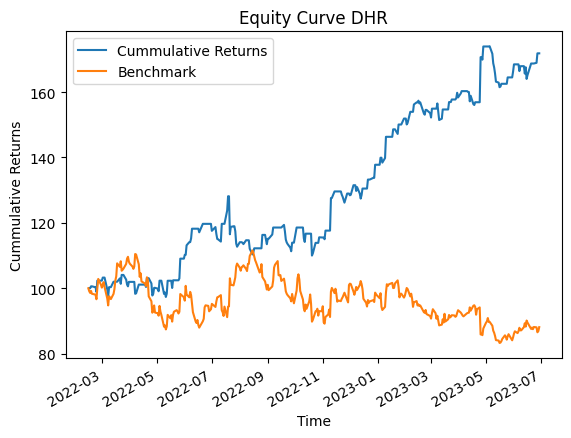

In [17]:
result['Daily Returns']=result['Close'].pct_change()*result['Signal'].shift(1)
result['Cummulative Returns']=(1+result['Daily Returns']).cumprod()*100
print(result[['Daily Returns','Cummulative Returns']].head(200))


stock_name='DHR'
result['Benchmark']=result['Close']/result['Close'].iloc[0]*100
result[['Cummulative Returns','Benchmark']].plot()
plt.title('Equity Curve '+stock_name)
plt.xlabel('Time')
plt.ylabel('Cummulative Returns')
plt.show()